In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Student-Pass-Fail-Data.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [6]:
df.describe()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [8]:
df.Pass_Or_Fail.value_counts()
#df['Pass_Or_Fail'].value_counts()

Pass_Or_Fail
0    501
1    499
Name: count, dtype: int64

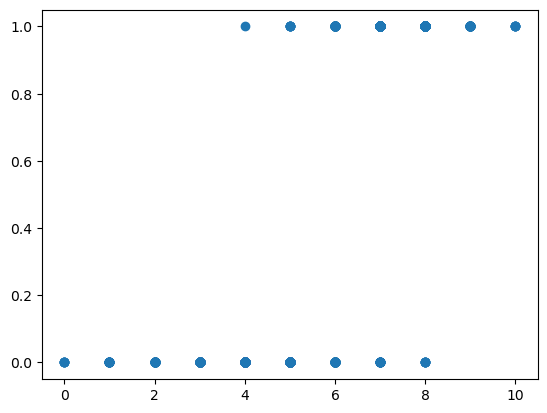

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Self_Study_Daily'], df['Pass_Or_Fail'])
plt.show()

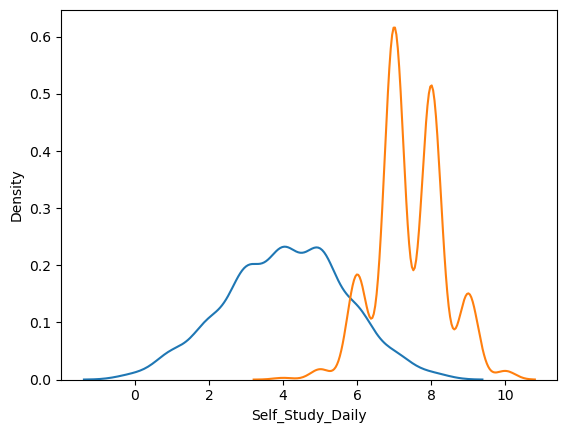

In [5]:
import seaborn as sns
#sns.set_style('whitegrid')
X_Fail = df.Self_Study_Daily[df.Pass_Or_Fail == 0]
X_Pass = df.Self_Study_Daily[df.Pass_Or_Fail == 1]
g = sns.kdeplot(X_Fail)
g = sns.kdeplot(X_Pass)

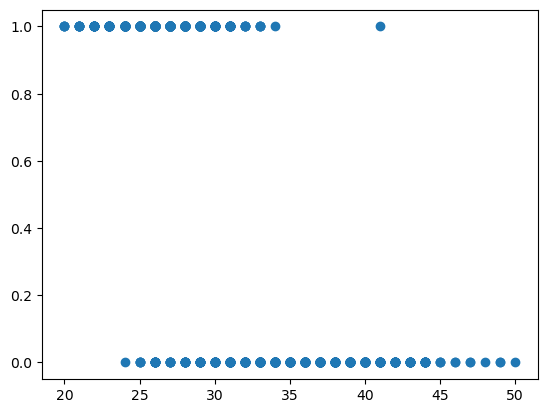

In [7]:
plt.scatter(df['Tution_Monthly'], df['Pass_Or_Fail'])
plt.show()

(array([ 26.,  74., 144., 143.,  78.,  28.,   5.,   0.,   0.,   1.]),
 array([20. , 22.1, 24.2, 26.3, 28.4, 30.5, 32.6, 34.7, 36.8, 38.9, 41. ]),
 <BarContainer object of 10 artists>)

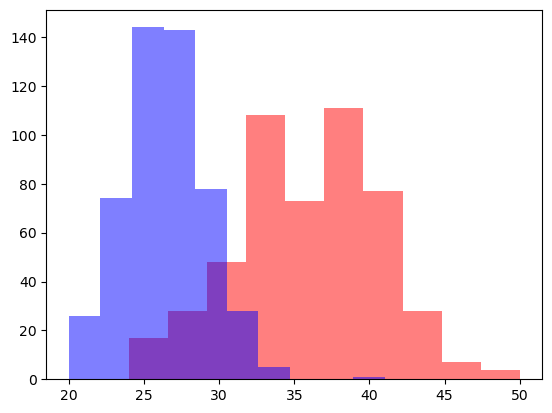

In [34]:
X_Fail = df.Tution_Monthly[df.Pass_Or_Fail == 0]
X_Success = df.Tution_Monthly[df.Pass_Or_Fail == 1]

plt.hist(X_Fail,bins=10,color='red',alpha=.5)
plt.hist(X_Success,bins=10,color='blue',alpha=.5)

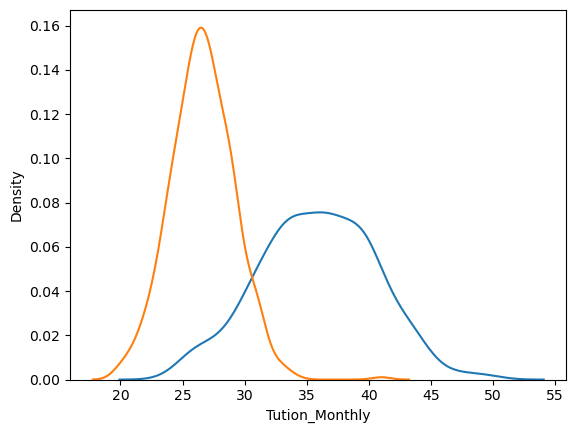

In [36]:
#sns.set_style('whitegrid')
g = sns.kdeplot(X_Fail, legend=False)
g = sns.kdeplot(X_Success, legend=False)

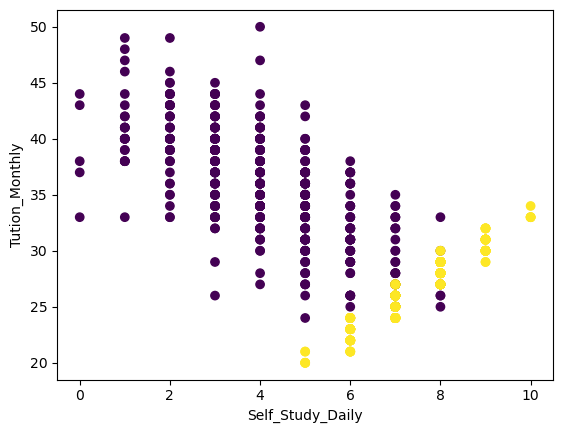

In [23]:
plt.scatter(df.Self_Study_Daily, df.Tution_Monthly, c=df.Pass_Or_Fail)
plt.xlabel('Self_Study_Daily')
plt.ylabel('Tution_Monthly')
plt.show()

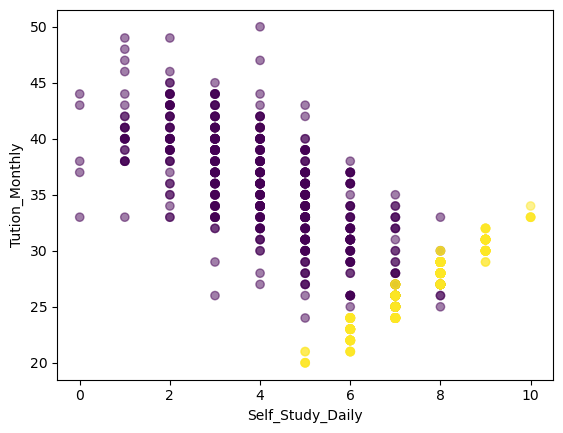

In [29]:
plt.scatter(df.Self_Study_Daily, df.Tution_Monthly, c=df.Pass_Or_Fail, alpha=0.5)
plt.xlabel('Self_Study_Daily')
plt.ylabel('Tution_Monthly')
plt.show()
'''하이퍼플레인>>독립변수보다 1차원 적음'''

In [12]:
#이항 정규분포 회귀
from sklearn.model_selection import train_test_split

X = df.drop('Pass_Or_Fail', axis = 1)
y = df.Pass_Or_Fail

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [38]:
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


In [40]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)

LogisticRegression()

In [42]:
LR_clf = LogisticRegression(solver='lbfgs')
LR_clf.fit(X_train, y_train)
'''score: linear>> R score(설명력) logistic>accuracy(정확도) '''
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.977
Test set score: 0.968


In [ ]:
'''선형에서 로지스틱
1. 기준점으로 0/1 나누기 >> 기준점 선을 찾기 애매함 >> 확률로 변형함(시그모이드 함수)
2.
'''

In [18]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
print('coef_', LR_clf.coef_) #스케일러
print('intercept_', LR_clf.intercept_) 

coef_ [[ 2.437 -0.744]]
intercept_ [5.111]


In [20]:
print(LR_clf.decision_function(X_test[:10])) # 예측된 값
print(np.round(LR_clf.predict_proba(X_test[:10]), 3)) #예상하기
print('Calculated Prediction Results:', LR_clf.predict_proba(X_test[:10]).argmax(axis=1)) # 각 행 별로 가장 높은 값을 가지는 index가 예측된 분류
print('Prediction Results:', LR_clf.predict(X_test[:10]))

[  3.776   2.827   3.032 -13.412   3.571   3.571   3.981   4.725 -24.442
   3.032]
[[0.022 0.978]
 [0.056 0.944]
 [0.046 0.954]
 [1.    0.   ]
 [0.027 0.973]
 [0.027 0.973]
 [0.018 0.982]
 [0.009 0.991]
 [1.    0.   ]
 [0.046 0.954]]
Calculated Prediction Results: [1 1 1 0 1 1 1 1 0 1]
Prediction Results: [1 1 1 0 1 1 1 1 0 1]


In [22]:
print(LR_clf.predict(np.asarray([[7, 30]])))

[0]


C:\Users\yen40\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
print(LR_clf.predict(np.asarray([[7, 20]])))

[1]


C:\Users\yen40\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
#종속변수가 2개 이상 >다항 로지스틱(정규분포) 회귀
#2개 이상이면 시그모이드 불가(합했을 때 1이 될 지 안될지 예상 불가) 시그모이드는 1개만 가능(2개에선 1개 해서 빼기)
#softmax사용
#범주 = class
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR) #boston['DESCR'] 도 가능
print(iris.data.shape, iris.target.shape)
print(iris.data[:5])
print(iris.target[:5])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
'''
클래스: 분류할 대상을 말하며 보통 0부터 시작하는 정수로 표현한다.
이 문제에서는 붓꽃의 세가지 종을 말하며 위 설명을 보면 아래와 같이 iris.target에 표현되어 있는 것을 알 수 있다.
0: Iris-Setosa
1: Iris-Versicolour
2: Iris-Virginica
>>정수 인코딩

따라서 이 문제는 주어진 4개의 독립변수로 0, 1, 2 중 하나의 값을 갖는 종속변수를 예측하는 문제로 볼 수 있다.
주의할 점은 0, 1, 2의 중간 값으로 예측되는 것이 아니라, 셋 중 하나의 값으로만 예측되어야 한다는 것이다.'''

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


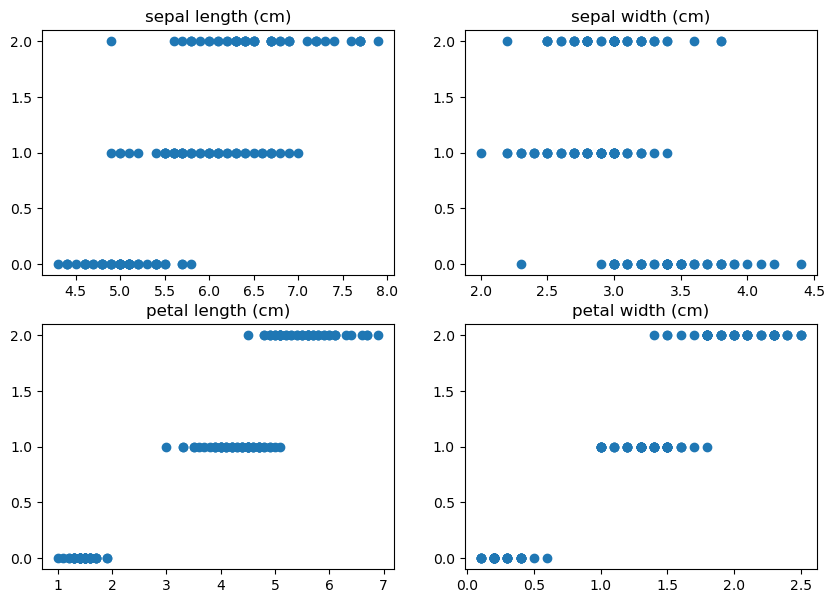

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) #총 네개의 독립변수가 있으므로 2x2 타일을 이용
#y = iris.target
#y = iris.target.astype('str') # target data의 type을 string으로 변환
y = iris.target # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < iris.data.shape[1]:
        x = iris.data[:,i]

        ax.set_title(iris.feature_names[i])
        ax.scatter(x, y)
plt.show()

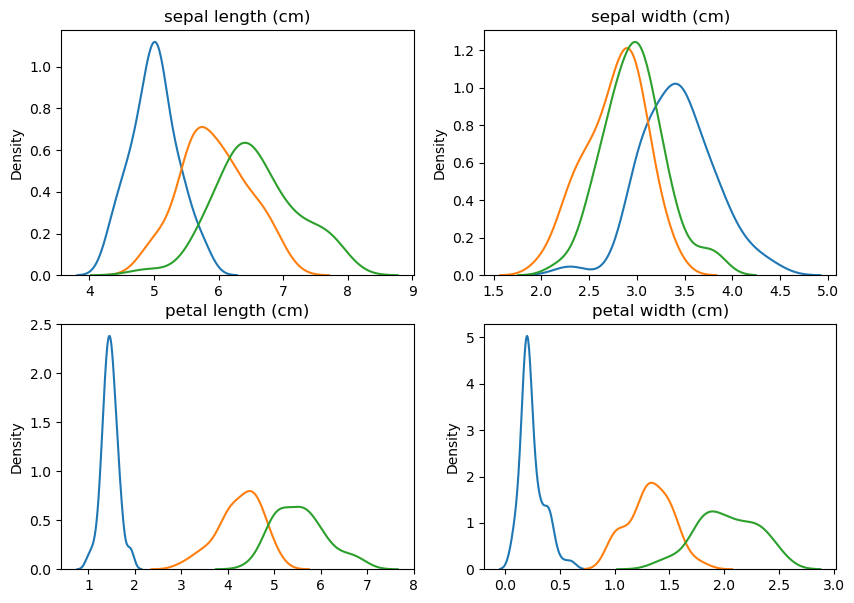

In [48]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) #총 네개의 독립변수가 있으므로 2x2 타일을 이용
#y = iris.target
#y = iris.target.astype('str') # target data의 type을 string으로 변환
y = iris.target # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < iris.data.shape[1]:
        x = iris.data[:,i]

        ax.set_title(iris.feature_names[i])
        sns.kdeplot(x[y == 0], ax=ax)
        sns.kdeplot(x[y == 1], ax=ax)
        sns.kdeplot(x[y == 2], ax=ax)
plt.show()

In [ ]:
# Plot also the training points
#plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target) #c>target별 분리 
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

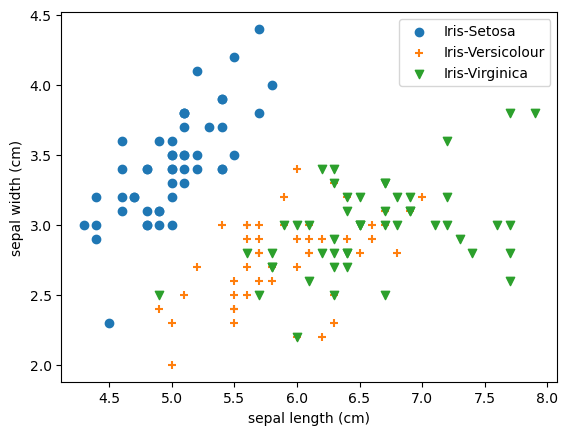

In [50]:
plt.scatter(iris.data[iris.target == 0, 0], iris.data[iris.target == 0, 1], marker='o')
plt.scatter(iris.data[iris.target == 1, 0], iris.data[iris.target == 1, 1], marker='+')
plt.scatter(iris.data[iris.target == 2, 0], iris.data[iris.target == 2, 1], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

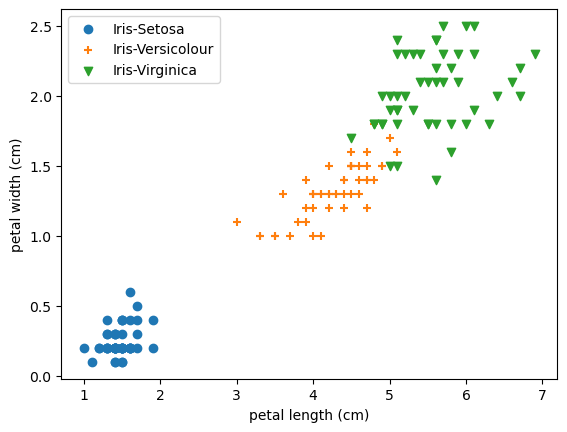

In [52]:
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], marker='o')
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], marker='+')
plt.scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], marker='v')

plt.legend(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
#LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)
LR_clf.fit(X_train[:, [2]], y_train)

LogisticRegression()

In [64]:
LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto') #slover 해결방법(최적화) 방법 
LR_clf.fit(X_train[:, 2].reshape(-1, 1), y_train)

LogisticRegression()

In [66]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train[:, 2].reshape(-1, 1), y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test[:, 2].reshape(-1, 1), y_test)))

Train set score: 0.975
Test set score: 0.867


In [68]:
#LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto')

LR_clf.fit(X_train, y_train)


LogisticRegression()

In [70]:
#컨버지(학습점 수렴) > warning의 경우 100번이 돌았어도 안됨 > MAX_iter를 늘려주기

LR_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
LR_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.992
Test set score: 0.867


In [74]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
print('coef_', LR_clf.coef_) # 0, 1, 2 각각에 대해 네 개의 계수
print('intercept_', LR_clf.intercept_) # 0, 1, 2각각에 대한 상수

coef_ [[-0.435  0.853 -2.307 -0.998]
 [ 0.339 -0.716 -0.097 -0.898]
 [ 0.096 -0.137  2.404  1.896]]
intercept_ [  9.343   3.809 -13.153]


In [76]:
print(LR_clf.decision_function(X_test[:10])) # 0, 1, 2 각각에 대해 예측된 값 클래스 수만큼 나오게 됨
print(np.round(LR_clf.predict_proba(X_test[:10]), 3)) #클래스 수만큼 나오게 됨, 확률
print('Prediction Results:', LR_clf.predict_proba(X_test[:10]).argmax(axis=1)) # 각 행 별로 가장 높은 값을 가지는 index가 예측된 분류

[[-4.225  1.555  2.671]
 [-2.324  1.712  0.612]
 [ 6.856  2.606 -9.462]
 [-2.411  1.78   0.631]
 [-2.733  1.721  1.012]
 [ 6.05   3.295 -9.345]
 [-3.814  2.111  1.703]
 [-1.775  2.204 -0.428]
 [ 6.266  2.67  -8.936]
 [-2.589  1.909  0.68 ]]
[[0.001 0.247 0.753]
 [0.013 0.741 0.246]
 [0.986 0.014 0.   ]
 [0.011 0.751 0.238]
 [0.008 0.665 0.327]
 [0.94  0.06  0.   ]
 [0.002 0.6   0.399]
 [0.017 0.917 0.066]
 [0.973 0.027 0.   ]
 [0.009 0.767 0.224]]
Prediction Results: [2 1 0 1 1 0 1 1 0 1]


In [78]:
#predict_proba 은 확률의 역할을 하므로 각 행의 값을 다 합치면 1이 됨
proba = LR_clf.predict_proba(X_test[:10])
import numpy as np
np.sum(proba, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])